In [1]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
#from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('PEP.csv')


In [4]:
data

,ticker,date,open,high,low,close
0,PEP,1972-06-01,0.000,1.60,1.580,1.60
1,PEP,1972-06-02,1.600,1.62,1.600,1.60
2,PEP,1972-06-05,1.600,1.60,1.540,1.57
3,PEP,1972-06-06,1.560,1.56,1.560,1.56
4,PEP,1972-06-07,1.560,1.56,1.550,1.55
...,...,...,...,...,...,...
12826,PEP,2023-04-13,182.620,184.61,182.105,184.38
12827,PEP,2023-04-14,183.335,184.02,182.920,183.51
12828,PEP,2023-04-17,184.190,184.75,183.481,184.45
12829,PEP,2023-04-18,184.770,185.22,183.740,184.83


In [5]:
data = data.filter(['close'])


In [6]:
# Lấy 100 dòng cuối cùng của df
data = data.tail(1000)
data

,close
11831,127.24
11832,126.83
11833,127.67
11834,127.27
11835,125.98
...,...
12826,184.38
12827,183.51
12828,184.45
12829,184.83


In [7]:
#Tiền xử lý
data.fillna(0, inplace=True)

# Normalize data
scaler = MinMaxScaler()
dataScale = scaler.fit_transform(data.values.reshape(-1,1))

In [8]:
# Hàm tính giá trị alpha tối ưu
def optimum_alpha(X):
    X_max = np.max(X)
    X_min = np.min(X)
    n = len(X)
    return ((X_max - X_min) - (1/n) * np.sum(X)) / (X_max - X_min)


In [9]:
def smoothed(X, alpha):
    S = np.zeros_like(X)
    S[0] = X[0]
    for i in range(1, len(X)):
        S[i] = S[i-1] + alpha*(X[i] - S[i-1])
    return S

In [10]:
alpha = optimum_alpha(dataScale)


In [11]:
S = smoothed(dataScale, alpha)
print("Giá trị alpha tối ưu:", alpha)
print("Chuỗi ban đầu:", dataScale)
print("Chuỗi đã được làm mịn:", S)


Giá trị alpha tối ưu: 0.4229524216176651
Chuỗi ban đầu: [[0.28437233]
 [0.2793705 ]
 [0.28961815]
 [0.28473832]
 [0.26900085]
 [0.26948884]
 [0.26985482]
 [0.29376601]
 [0.28339636]
 [0.28644626]
 [0.31011346]
 [0.32133707]
 [0.32426497]
 [0.31792119]
 [0.30645358]
 [0.31889716]
 [0.3176772 ]
 [0.31194339]
 [0.28913017]
 [0.29571795]
 [0.30108576]
 [0.29364402]
 [0.30559961]
 [0.30669757]
 [0.33500061]
 [0.34219837]
 [0.36037575]
 [0.3618397 ]
 [0.35708186]
 [0.35634988]
 [0.35390997]
 [0.35134805]
 [0.34878614]
 [0.34317433]
 [0.352812  ]
 [0.36879346]
 [0.36635354]
 [0.36854947]
 [0.36452361]
 [0.34634622]
 [0.33866049]
 [0.33182872]
 [0.34085641]
 [0.34768818]
 [0.36671953]
 [0.35488593]
 [0.34927412]
 [0.33927046]
 [0.37184336]
 [0.37111138]
 [0.35805783]
 [0.36867147]
 [0.36440161]
 [0.35195803]
 [0.35317799]
 [0.31914115]
 [0.32145907]
 [0.32707088]
 [0.30840551]
 [0.30572161]
 [0.33292668]
 [0.33670855]
 [0.32389899]
 [0.29132609]
 [0.28315237]
 [0.29266805]
 [0.24972551]
 [0.27

D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Smooth')

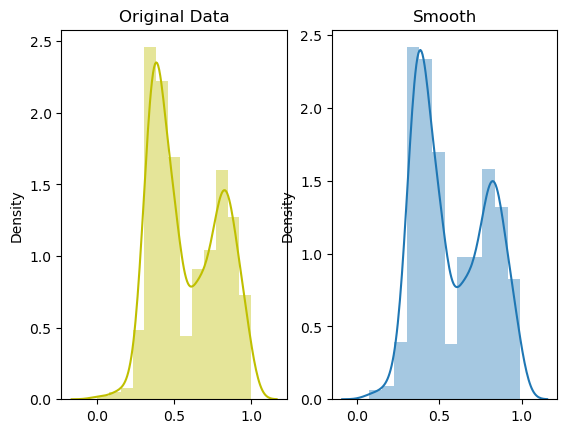

In [12]:
import seaborn as sns

fig, ax=plt.subplots(1,2)
sns.distplot(dataScale, ax=ax[0], color='y')
ax[0].set_title("Original Data")


sns.distplot(S,ax=ax[1])
ax[1].set_title("Smooth")


In [13]:
#Chia dữ liệu thành train test
data = pd.DataFrame(S)

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [14]:

data = train_data

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [15]:
#Chuẩn bị dữ liệu để đưa vào mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
          
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


size_window = 7
size_predict = 1
stepWindow = 1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)

In [16]:
start_time = time.time()

# Tạo một list chứa các số Lucas để sử dụng làm số lượng hidden layer
lucas_list = [3, 4, 7, 11, 18, 29, 47, 76]

# Chọn số lượng hidden layer sử dụng theo số Lucas
num_hidden_layer = lucas_list[3] # ví dụ chọn số 11

In [17]:

# Tạo mô hình CNN
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(size_window, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
for i in range(num_hidden_layer): #Thêm num_hidden_layer lớp ẩn với 64 đơn vị mỗi lớp
    model.add(Dense(units=100, activation='relu')) #Tham số chỉ định số lượng tế bào thần kinh trong lớp
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

# Compile mô hình với Adam optimizer và Mean Squared Error loss
model.compile(loss='mse', optimizer='adam')


In [18]:
history = model.fit(X_train, y_train, epochs=9000, batch_size=8)

Epoch 1/9000
79/79 [==============================] - 3s 3ms/step - loss: 0.0550
Epoch 2/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 4/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 5/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 6/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 7/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 8/9000
79/79 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 9/9000
 1/79 [..............................] - ETA: 0s - loss: 0.0126

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, (-1, 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAPE: ', mape)

In [ ]:
len(data)